# MACHINE LEARNING: Portugal Wine under Two Class approach for Quality classification with Logistic Regression using R and K fold cross-validation
# Module 1: Data Preprocessing and Exploratory Data Analysis (EDA)

By: Hector Alvaro Rojas | Data Science, Visualizations and Applied Statistics | October 25, 2017<br>
Url: [http://www.arqmain.net]   &nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;   GitHub: [https://github.com/arqmain]
<hr>

## 0 Introduction

This project presents a way to develops a Logistic Regression algorithm of machine learning by using stepwise method and backward elimination to select the functional equation to be used. 

The ROC metric was used to evaluate the model.  The performance metric was evaluated by using the "K fold cross validation" method. I consider 70% and 30% original dataset splitting for the training and testing datasets respectively.

I used the wine data set from the UCI Machine Learning data repository. The goal is to predict wine quality which has 7 integer values from 3 to 9.

The original data along with detailed description can be found here [ http://archive.ics.uci.edu/ml/datasets/Wine+Quality].

The original data is separated into white and red datasets. I combined them and created one additional variable: "Class" indicating "white" or "red" wine. After that, I re-coded the "quality" variable to indicate scores greater than or equal to 6 (denoted as "Good") or to indicate scores smaller than 6(denoted as "Bad").

The "wine" dataset created by me contains 6497 observations (registers) of wine varieties. All wines are produced in a particular area of Portugal. Data are collected on 12 different properties of the wine zone of which is Quality, based on sensory data, and the rest are on chemical properties of the wines. All chemical properties of wines are continuous variables. Quality is an ordinal variable with a possible ranking from 1 (worst) to 10 (best). Each variety of wine is tasted by three independent tasters and the final rank assigned is the median rank given by the tasters.  

The columns of the dataset are the variables (features): fixed acidity; volatile acidity; citric acid; residual sugar; chlorides; free sulfur dioxide; total sulfur dioxide; density; pH; sulphates; alcohol; quality; Class.

I decided to use two datasets to develop the project: df; dfffull.  Dataset "df" keep all registers.  The other one, "dfffull", consider all registers but replace outliers by a "threshold" value which is generated for each variable using the upper limit of its Box-plot.

The project develops Logistic Regression algorithm of machine learning to classify the quality of the wine "Good" or "Bad" according to the 12 variables that characterize the wine subject to classification.

## I Loading and Checking the Data


### 11 About some R modules and Libraries

Let’s import some of the modules, functions and objects we are going to use.

In [ ]:
# first remove ALL objects and close all possible connections
# closeAllConnections()
rm(list = ls(all = TRUE)) # Does remove all inclusive hidden

# see your memory size
memory.size() 

In [1]:
# install packages and load libraries
ipak <- function(pkg){
    new.pkg <- pkg[!(pkg %in% installed.packages()[, "Package"])]
    if (length(new.pkg)) 
        install.packages(new.pkg, dependencies = c("Depends", "Suggests"))
    sapply(pkg, require, character.only = TRUE)
}
# usage
packages <- c("plyr", "dplyr", "tidyr", "psych", "reshape2", "corrplot", "GGally", "ggplot2", "Amelia", "pastecs", "caret")
ipak(packages)

    

Loading required package: plyr
Loading required package: dplyr

Attaching package: 'dplyr'

The following objects are masked from 'package:plyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: tidyr
Loading required package: psych
Loading required package: reshape2

Attaching package: 'reshape2'

The following object is masked from 'package:tidyr':

    smiths

Loading required package: corrplot
Loading required package: GGally

Attaching package: 'GGally'

The following object is masked from 'package:dplyr':

    nasa

Loading required package: ggplot2

Attaching package: 'ggplot2'

The following objects are masked from 'package:psych':

    %+%, alpha

Loading required package: Amelia
Loading required package: Rcpp
## 
## Amelia II: Multiple Imputation
## (

plyr    dplyr    tidyr    psych reshape2 corrplot   GGally  ggplot2 
    TRUE     TRUE     TRUE     TRUE     TRUE     TRUE     TRUE     TRUE 
  Amelia  pastecs    caret 
    TRUE     TRUE     TRUE

### 12 Loading the data

In [3]:
# define path location of datasets
wine1.url <- "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
wine2.url <- "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

# read datasets
wine1 <- read.csv(wine1.url, header=TRUE, sep=';')
wine2 <- read.csv(wine2.url, header=TRUE, sep=';')

# create dataset base
wine <- rbind(cbind(wine1, Class='white'), cbind(wine2, Class='red'))
wine$quality<- ifelse(wine$quality<6, "Bad", ifelse(wine$quality>=6, "Good", NA))
attach(wine)


The following objects are masked from wine (pos = 3):

    alcohol, chlorides, citric.acid, Class, density, fixed.acidity,
    free.sulfur.dioxide, pH, quality, residual.sugar, sulphates,
    total.sulfur.dioxide, volatile.acidity



## II Data Checking

In [4]:
# take a look of the dataset
head(wine)
names(wine)

# dimensions (or shape) of dataset
dim(wine)

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,Class
7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,Good,white
6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,Good,white
8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,Good,white
7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,Good,white
7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,Good,white
8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,Good,white


[1] "fixed.acidity"        "volatile.acidity"     "citric.acid"         
 [4] "residual.sugar"       "chlorides"            "free.sulfur.dioxide" 
 [7] "total.sulfur.dioxide" "density"              "pH"                  
[10] "sulphates"            "alcohol"              "quality"             
[13] "Class"

[1] 6497   13

This is exactly the result we are looking for. We should see 6497 instances (registers or rows) and 13 attributes (fields, columns or variables) as an answer.

In [5]:
# get some information about the dataset
str(wine)

'data.frame':	6497 obs. of  13 variables:
 $ fixed.acidity       : num  7 6.3 8.1 7.2 7.2 8.1 6.2 7 6.3 8.1 ...
 $ volatile.acidity    : num  0.27 0.3 0.28 0.23 0.23 0.28 0.32 0.27 0.3 0.22 ...
 $ citric.acid         : num  0.36 0.34 0.4 0.32 0.32 0.4 0.16 0.36 0.34 0.43 ...
 $ residual.sugar      : num  20.7 1.6 6.9 8.5 8.5 6.9 7 20.7 1.6 1.5 ...
 $ chlorides           : num  0.045 0.049 0.05 0.058 0.058 0.05 0.045 0.045 0.049 0.044 ...
 $ free.sulfur.dioxide : num  45 14 30 47 47 30 30 45 14 28 ...
 $ total.sulfur.dioxide: num  170 132 97 186 186 97 136 170 132 129 ...
 $ density             : num  1.001 0.994 0.995 0.996 0.996 ...
 $ pH                  : num  3 3.3 3.26 3.19 3.19 3.26 3.18 3 3.3 3.22 ...
 $ sulphates           : num  0.45 0.49 0.44 0.4 0.4 0.44 0.47 0.45 0.49 0.45 ...
 $ alcohol             : num  8.8 9.5 10.1 9.9 9.9 10.1 9.6 8.8 9.5 11 ...
 $ quality             : chr  "Good" "Good" "Good" "Good" ...
 $ Class               : Factor w/ 2 levels "white","red": 1 1 

The above output tells us that there are 6497 samples and 13 variables. The response variable is Class. The eleven predictor variables are of the numeric class and the response variable, quality, is of the integer class.

In [10]:
# verify response variable "quality" as factor
wine$quality <- as.factor(wine$quality)
wine$Class <- as.factor(wine$Class)

In [11]:
# get some information about the dataset
str(wine)

'data.frame':	6497 obs. of  13 variables:
 $ fixed.acidity       : num  7 6.3 8.1 7.2 7.2 8.1 6.2 7 6.3 8.1 ...
 $ volatile.acidity    : num  0.27 0.3 0.28 0.23 0.23 0.28 0.32 0.27 0.3 0.22 ...
 $ citric.acid         : num  0.36 0.34 0.4 0.32 0.32 0.4 0.16 0.36 0.34 0.43 ...
 $ residual.sugar      : num  20.7 1.6 6.9 8.5 8.5 6.9 7 20.7 1.6 1.5 ...
 $ chlorides           : num  0.045 0.049 0.05 0.058 0.058 0.05 0.045 0.045 0.049 0.044 ...
 $ free.sulfur.dioxide : num  45 14 30 47 47 30 30 45 14 28 ...
 $ total.sulfur.dioxide: num  170 132 97 186 186 97 136 170 132 129 ...
 $ density             : num  1.001 0.994 0.995 0.996 0.996 ...
 $ pH                  : num  3 3.3 3.26 3.19 3.19 3.26 3.18 3 3.3 3.22 ...
 $ sulphates           : num  0.45 0.49 0.44 0.4 0.4 0.44 0.47 0.45 0.49 0.45 ...
 $ alcohol             : num  8.8 9.5 10.1 9.9 9.9 10.1 9.6 8.8 9.5 11 ...
 $ quality             : Factor w/ 2 levels "Bad","Good": 2 2 2 2 2 2 2 2 2 2 ...
 $ Class               : Factor w/ 2 levels

In [12]:
# count the number of non-NA values by variables in the dataset
wine %>% 
  gather(var, value) %>% 
  count(var)

Warning message:
"attributes are not identical across measure variables; they will be dropped"

var,n
alcohol,6497
chlorides,6497
citric.acid,6497
Class,6497
density,6497
fixed.acidity,6497
free.sulfur.dioxide,6497
pH,6497
quality,6497
residual.sugar,6497


In [13]:
#checking the Class distribution to find out about balance or imbalance dataset 
table(quality)

quality
 Bad Good 
2384 4113 

In [14]:
# summarize the Class distribution
 wine %>%
  group_by(quality) %>%
  summarise(total=n()) %>%
  mutate(percentage=round(total/sum(total)*100,1)) %>%
  select(quality,total,percentage)

quality,total,percentage
Bad,2384,36.7
Good,4113,63.3


It’s clear from the above table that there is a class imbalance. So, we will have to deal with an unbalanced dataset. There are 6497 samples but only 2384 (36.7%) are of the Bad quality. Anyway, there are enough samples of Good class to split the data into useable training and test sets and perform cross-validation.


#### <i><u>How about missing values?</u></i>

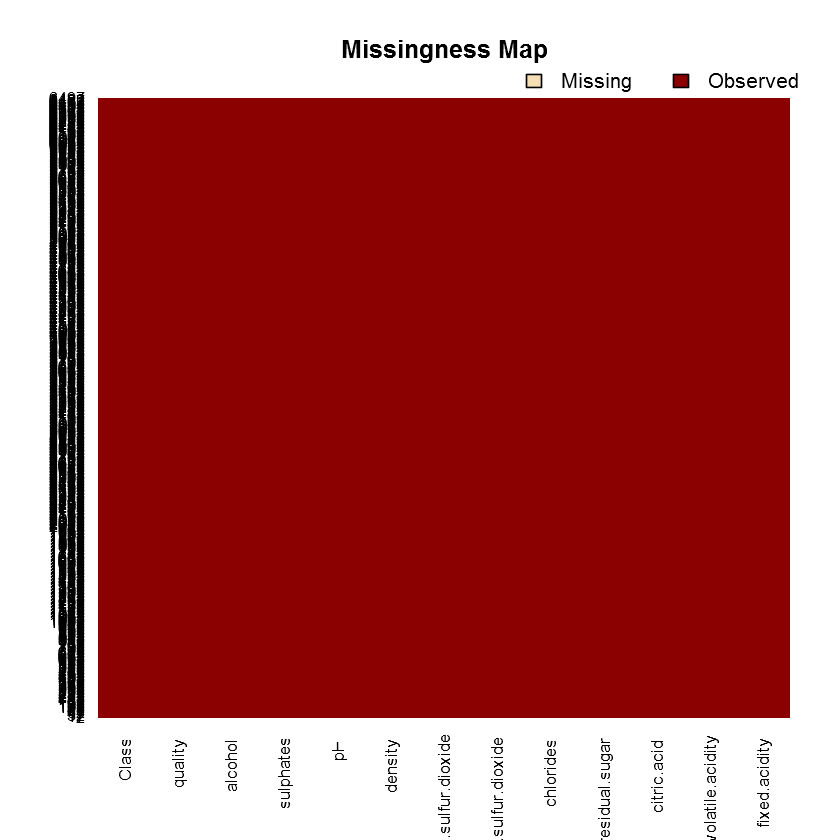

In [15]:
# This is a map for visualizing the missing rows (Package Amelia).
library(Amelia)
missmap(wine)

In [16]:
#  tell R to find all rows with missing values and list them fully.
wine[ !complete.cases(wine) , ]

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,Class


So, there is no missing values in the full dataset.

#### <i><u>How about some visualization and correlations to better understand each attribute?</u></i>

We can notice that the variables are not in the same scale of measurement.  So, we will standardize them in order to compare them in a more easy way. The variables (except "Class" and "quality") will have a mean value of 0 and a standard deviation of 1.  We will do that by using the caret package which has a number of useful data transforms.

In [17]:
# calculate the pre-process parameters from the dataset
preprocessParams <- preProcess(wine, method=c("center", "scale"))
# summarize transform parameters
print(preprocessParams)
# transform the dataset using the parameters
winez <- predict(preprocessParams, wine)
# summarize the transformed dataset
summary(winez)

Created from 6497 samples and 13 variables

Pre-processing:
  - centered (11)
  - ignored (2)
  - scaled (11)



 fixed.acidity     volatile.acidity   citric.acid       residual.sugar   
 Min.   :-2.6344   Min.   :-1.5772   Min.   :-2.19266   Min.   :-1.0180  
 1st Qu.:-0.6289   1st Qu.:-0.6661   1st Qu.:-0.47230   1st Qu.:-0.7657  
 Median :-0.1661   Median :-0.3017   Median :-0.05941   Median :-0.5135  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.0000  
 3rd Qu.: 0.3739   3rd Qu.: 0.3665   3rd Qu.: 0.49111   3rd Qu.: 0.5584  
 Max.   : 6.6989   Max.   : 7.5338   Max.   : 9.23057   Max.   :12.6858  
   chlorides       free.sulfur.dioxide total.sulfur.dioxide    density        
 Min.   :-1.3425   Min.   :-1.66345    Min.   :-1.9416      Min.   :-2.53000  
 1st Qu.:-0.5148   1st Qu.:-0.76202    1st Qu.:-0.6855      1st Qu.:-0.78589  
 Median :-0.2579   Median :-0.08594    Median : 0.0399      Median : 0.06448  
 Mean   : 0.0000   Mean   : 0.00000    Mean   : 0.0000      Mean   : 0.00000  
 3rd Qu.: 0.2559   3rd Qu.: 0.59014    3rd Qu.: 0.7122      3rd Qu.: 0.76479  
 Max.   

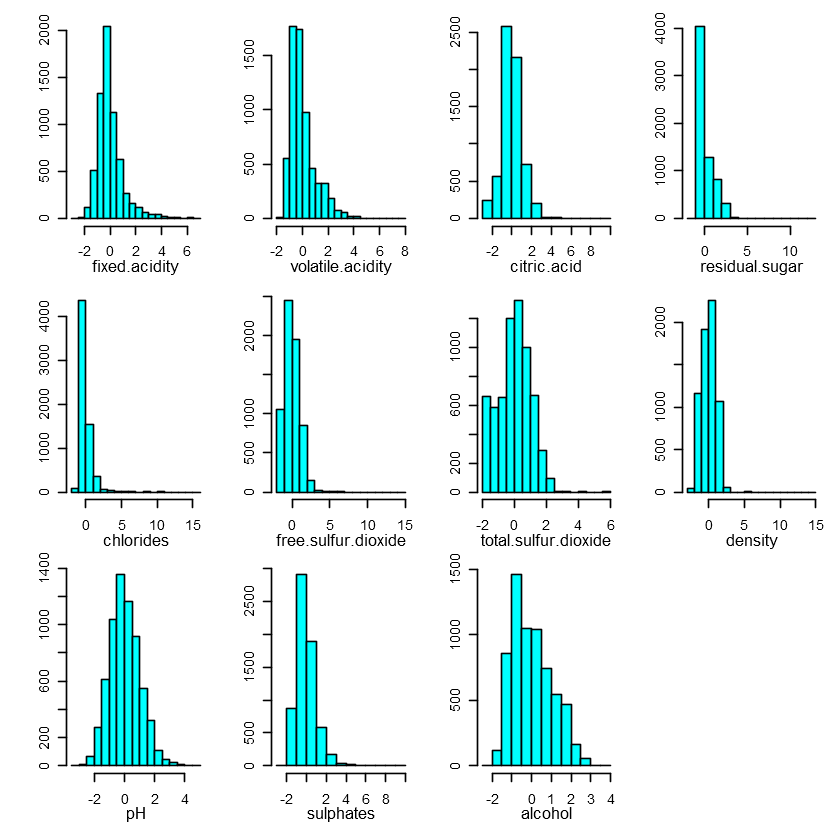

In [25]:
# histograms
par(mfrow=c(3,4), oma = c(1,1,0,0) + 0.1,  mar = c(3,3,1,1) + 0.1)
for(i in 1:11) {
    hist(winez[,i], main="", col="cyan", xlab="", ylab="")
    mtext(names(winez)[i], side=1, outer=F, line=2, cex=0.8)
}

In [20]:
# box and whisker plots of each variable

long <- melt(winez[,-c(12:13)])

No id variables; using all as measure variables


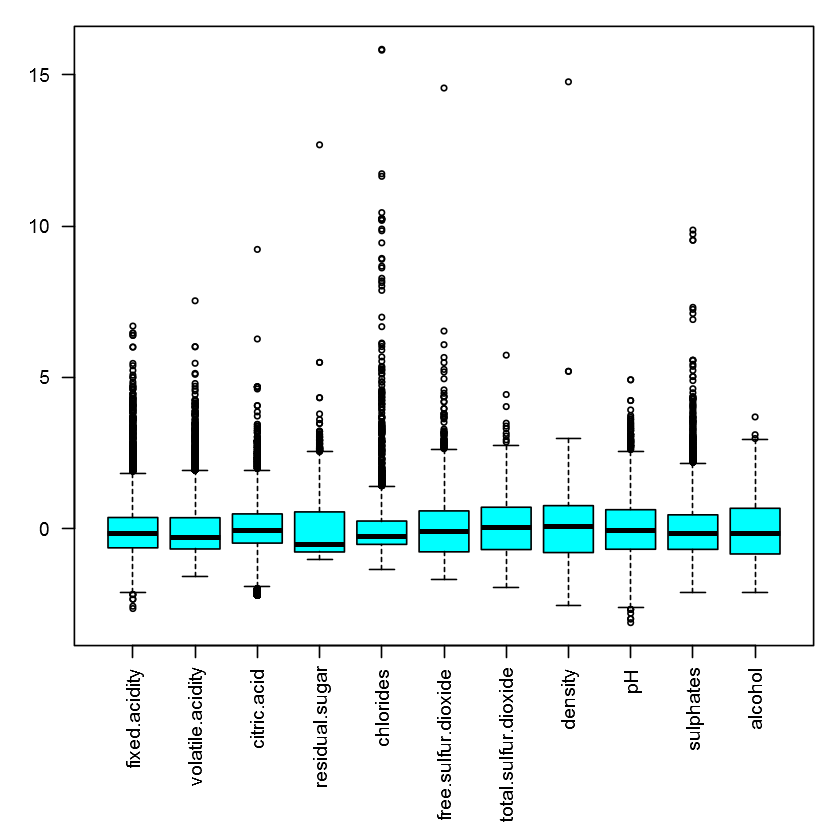

In [21]:
par(mfrow=c(1,1),  mar = c(3,3,1,1) + 0.1)
par(oma = c(5, 0, 0, 0))
plot(value ~ variable, col="cyan", ylab="Z", xlab="", las=2, data=long, cex=0.5, cex.axis=0.9)

Observations regarding variables: 
* All variables have outliers.
* If the outliers from fixed acidity, volatile acidity and citric acid are eliminated the distribution of the variables may be taken to be symmetric.
* Residual sugar has a positively skewed distribution.
* Some of the variables, for instance free sulphur dioxide and density, have a few outliers.
* Mostly outliers are on the positive side of distributions.
* Alcohol does not have pronounced outliers.

The following summary statistics support all the above observations.

In [22]:
#summarize full dataset by columns 
propmiss <- function(dataframe) {
	m <- sapply(dataframe, function(x) {
		data.frame(
			n=length(!is.na(x)), 
			nmiss=sum(is.na(x)), 
			propmiss=sum(is.na(x))/length(x),
			P25=round(quantile(x, 0.25, na.rm=TRUE),2),
			P75=round(quantile(x, 0.75, na.rm=TRUE),2),            
			IQR=round(IQR(x, na.rm=TRUE),2),
			Threshold= round(quantile(x, 0.75, na.rm=TRUE),2) + 1.5*round(IQR(x, na.rm=TRUE),2),            
			Minimum=round(min(x, na.rm=TRUE),2),
			Median=round(median(x, na.rm=TRUE),2),            
			Maximum=round(max(x, na.rm=TRUE),2),
			Range=round(max(x, na.rm=TRUE)-min(x, na.rm=TRUE),2),
			Mean=round(mean(x, na.rm=TRUE),2),
			StDev=round(sd(x, na.rm=TRUE),2)
		)
	})
	d <- data.frame(t(m))
	d <- sapply(d, unlist)
	d <- as.data.frame(d)
	d$variable <- row.names(d)
	row.names(d) <- NULL
	d <- cbind(d[ncol(d)],d[-ncol(d)])
	return(d[order(d$propmiss), ])
}

In [23]:
# summarize the original dataset
(summary=propmiss(wine[,-c(12:13)])[,-(3:4)])

variable,n,P25,P75,IQR,Threshold,Minimum,Median,Maximum,Range,Mean,StDev
fixed.acidity,6497,6.40,7.70,1.30,9.650,3.80,7.00,15.90,12.10,7.22,1.30
volatile.acidity,6497,0.23,0.40,0.17,0.655,0.08,0.29,1.58,1.50,0.34,0.16
citric.acid,6497,0.25,0.39,0.14,0.600,0.00,0.31,1.66,1.66,0.32,0.15
residual.sugar,6497,1.80,8.10,6.30,17.550,0.60,3.00,65.80,65.20,5.44,4.76
chlorides,6497,0.04,0.06,0.03,0.105,0.01,0.05,0.61,0.60,0.06,0.04
free.sulfur.dioxide,6497,17.00,41.00,24.00,77.000,1.00,29.00,289.00,288.00,30.53,17.75
total.sulfur.dioxide,6497,77.00,156.00,79.00,274.500,6.00,118.00,440.00,434.00,115.74,56.52
density,6497,0.99,1.00,0.00,1.000,0.99,0.99,1.04,0.05,0.99,0.00
pH,6497,3.11,3.32,0.21,3.635,2.72,3.21,4.01,1.29,3.22,0.16
sulphates,6497,0.43,0.60,0.17,0.855,0.22,0.51,2.00,1.78,0.53,0.15


In [24]:
# summarize the transformed dataset
(summary=propmiss(winez[,-c(12:13)])[,-(3:4)])

variable,n,P25,P75,IQR,Threshold,Minimum,Median,Maximum,Range,Mean,StDev
fixed.acidity,6497,-0.63,0.37,1.00,1.870,-2.63,-0.17,6.70,9.33,0,1
volatile.acidity,6497,-0.67,0.37,1.03,1.915,-1.58,-0.30,7.53,9.11,0,1
citric.acid,6497,-0.47,0.49,0.96,1.930,-2.19,-0.06,9.23,11.42,0,1
residual.sugar,6497,-0.77,0.56,1.32,2.540,-1.02,-0.51,12.69,13.70,0,1
chlorides,6497,-0.51,0.26,0.77,1.415,-1.34,-0.26,15.84,17.18,0,1
free.sulfur.dioxide,6497,-0.76,0.59,1.35,2.615,-1.66,-0.09,14.56,16.23,0,1
total.sulfur.dioxide,6497,-0.69,0.71,1.40,2.810,-1.94,0.04,5.74,7.68,0,1
density,6497,-0.79,0.76,1.55,3.085,-2.53,0.06,14.77,17.30,0,1
pH,6497,-0.67,0.63,1.31,2.595,-3.10,-0.05,4.92,8.02,0,1
sulphates,6497,-0.68,0.46,1.14,2.170,-2.09,-0.14,9.87,11.96,0,1


Mean is usually greater than the median and the Range is much larger compared to the IQR. This situations are telling us that we have in presence of a dataset with outliers. The second table show even more clearly the outlier situation. 


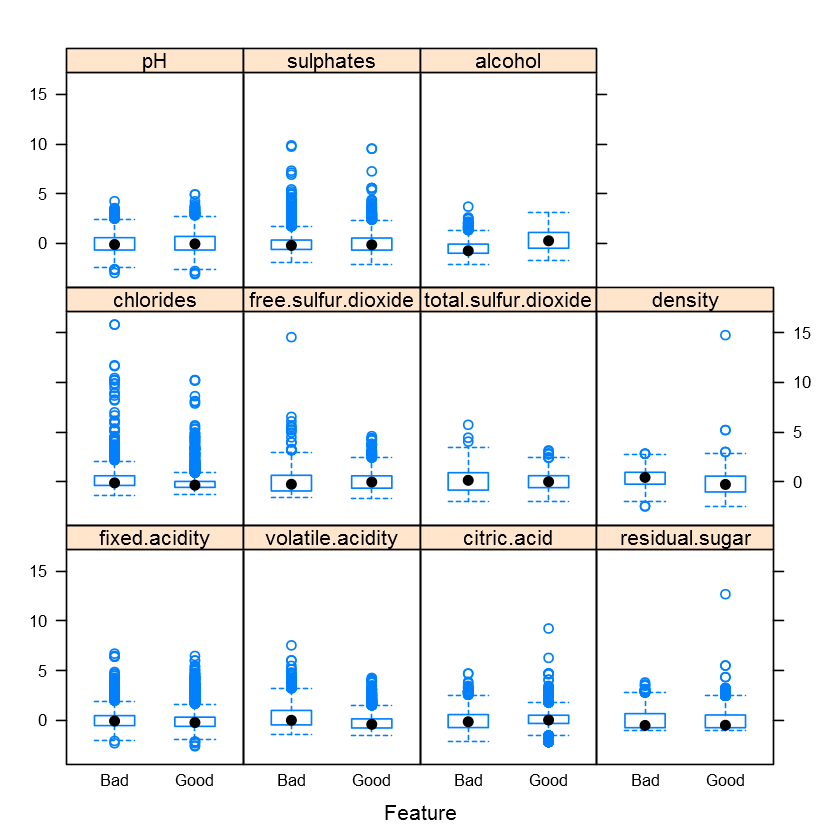

In [30]:
# box and whisker plots of each variable by quality (Bad, Good)
featurePlot(x=winez[,1:11], y=winez[,12], plot="box")

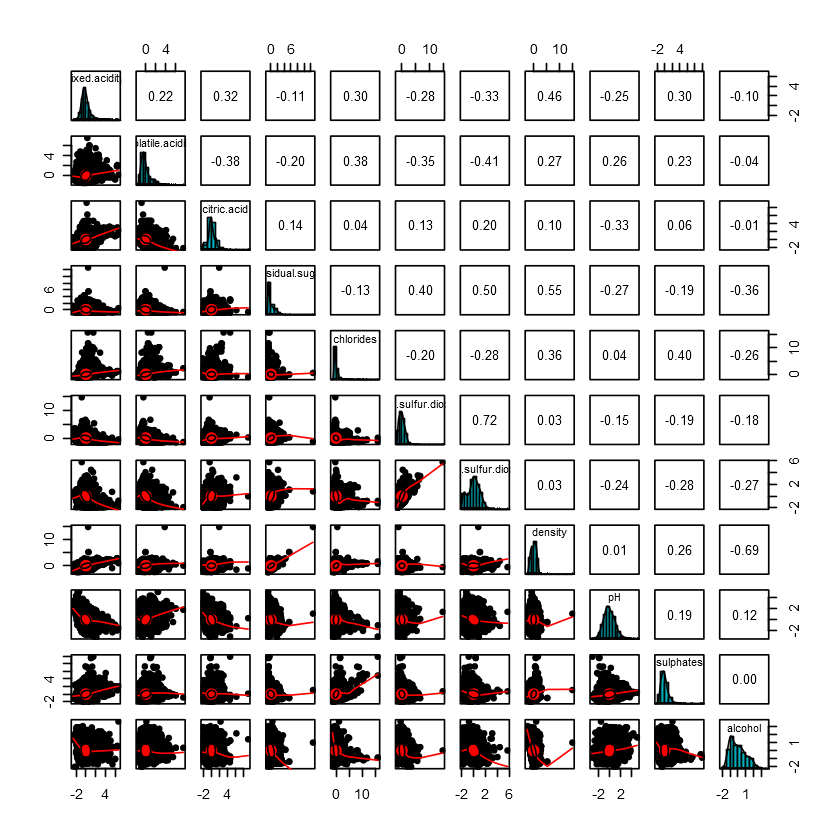

In [32]:
# scatter plot matrix, variable distribution and Pearson linear correlation
pairs.panels(winez[,-c(12:13)], 
             method = "pearson", # correlation method
             hist.col = "#00AFBB",
             density = TRUE,  # show density plots
             ellipses = TRUE # show correlation ellipses
             )

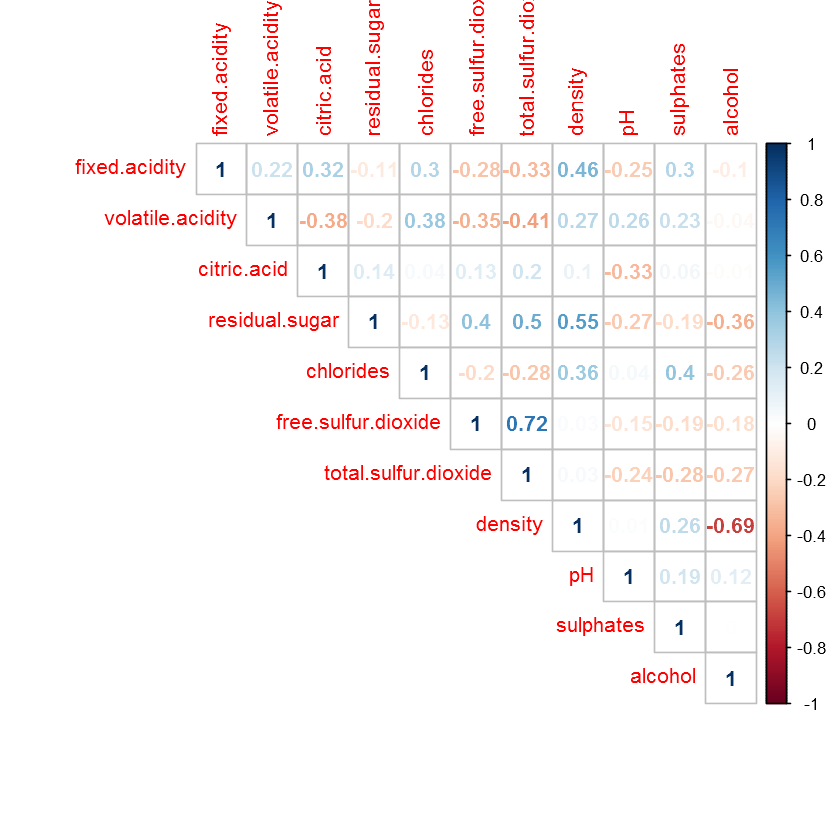

In [33]:
# Pearson linear correlation
M<-cor(winez[,1:11])
#par(mfrow=c(1,1))
#par(oma = c(0, 0, 0, 0))
corrplot(M, method="number", type="upper")
#corrplot(M, method="number", type="lower")

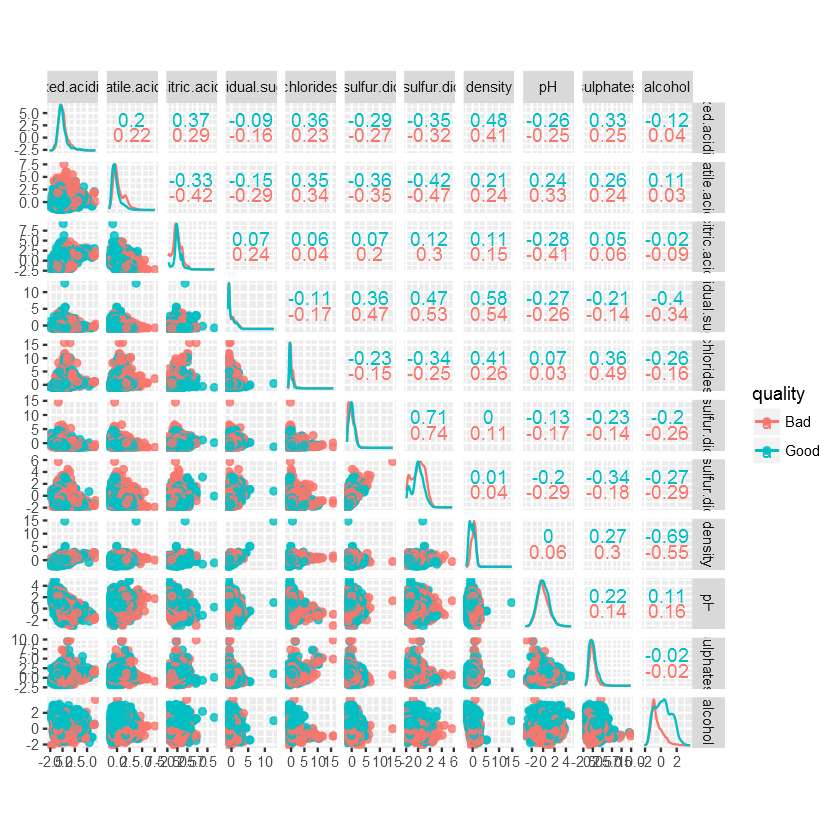

In [35]:
# scatter plot matrix by quality
ggscatmat(winez, columns = 1:11, color="quality", alpha=0.8)

After all the Data Checking we can resume the most important detected situations:

* Our dataset is an imbalance one. There are 6497 registers but only 2384 (36.7%) are of the Bad quality.
* All variables have outliers.  Some of them have a lot, some have a few.
* Mostly outliers are on the positive side of distributions.
* The simple Pearson linear correlation among the variables (132 to be logically considered) 7 present 0.40 or more as a measure. 
* Some variables are better in separating Good quality than others. For instance, total.sulfur.dioxide and  alcohol appear to do a better job than the rest.

However, the "density" variable with "alcohol" at the same time as "free.sulfur.dioxide" with "total.sulfor.dioxide" presented a high correlation, 0.69 and 0.72 respectively. This can cause problems of collinearity that can affect the normal operation of the algorithms since we are in the presence of double information.

So, after analyzing the distribution of the correlation through the categories of the variable Class, I decided to remove the variables "density" and "free.sulfor.dioxide" from the base.

## III Data Pre-processing

The data preparation consider to define two dataset to be used in this project:

* Original dataset (df)
* Dataset whitout outliers (dfffull)

### 31 Original dataset (df)

We delete all files used until here. Thus we free memory and we do not get confused on the road.

We consider the original dataset without the variables "density" and "free.sulfor.dioxide".

As a consequence, we obtain the file "df" that goes on to represent the base with the original data pre-processed in a format ready to be used in the modeling.


In [36]:
# remove and dettach dfwhite and dfwhitez datasets
rm("wine", "winez")
detach("wine","winez")

In [1]:
# define path location of datasets
wine1.url <- "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
wine2.url <- "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

# read datasets
wine1 <- read.csv(wine1.url, header=TRUE, sep=';')
wine2 <- read.csv(wine2.url, header=TRUE, sep=';')

# create dataset base
paso <- rbind(cbind(wine1, Class='white'), cbind(wine2, Class='red'))
paso$quality<- ifelse(paso$quality<6, "Bad", ifelse(paso$quality>=6, "Good", NA))

df= subset(paso, select=c('fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar', 'chlorides' ,'total.sulfur.dioxide','pH', 'sulphates', 'alcohol', 'quality', 'Class'))
attach(df)
head(df)
rm("paso")

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,total.sulfur.dioxide,pH,sulphates,alcohol,quality,Class
7.0,0.27,0.36,20.7,0.045,170,3.00,0.45,8.8,Good,white
6.3,0.30,0.34,1.6,0.049,132,3.30,0.49,9.5,Good,white
8.1,0.28,0.40,6.9,0.050,97,3.26,0.44,10.1,Good,white
7.2,0.23,0.32,8.5,0.058,186,3.19,0.40,9.9,Good,white
7.2,0.23,0.32,8.5,0.058,186,3.19,0.40,9.9,Good,white
8.1,0.28,0.40,6.9,0.050,97,3.26,0.44,10.1,Good,white


In [2]:
# verify response variable "quality" as factor. Remember, the class factor is always used for categorical variables.
df$quality <- as.factor(df$quality)
df$Class <- as.factor(df$Class)

In [40]:
# get some information about the dataset
str(df)

'data.frame':	6497 obs. of  11 variables:
 $ fixed.acidity       : num  7 6.3 8.1 7.2 7.2 8.1 6.2 7 6.3 8.1 ...
 $ volatile.acidity    : num  0.27 0.3 0.28 0.23 0.23 0.28 0.32 0.27 0.3 0.22 ...
 $ citric.acid         : num  0.36 0.34 0.4 0.32 0.32 0.4 0.16 0.36 0.34 0.43 ...
 $ residual.sugar      : num  20.7 1.6 6.9 8.5 8.5 6.9 7 20.7 1.6 1.5 ...
 $ chlorides           : num  0.045 0.049 0.05 0.058 0.058 0.05 0.045 0.045 0.049 0.044 ...
 $ total.sulfur.dioxide: num  170 132 97 186 186 97 136 170 132 129 ...
 $ pH                  : num  3 3.3 3.26 3.19 3.19 3.26 3.18 3 3.3 3.22 ...
 $ sulphates           : num  0.45 0.49 0.44 0.4 0.4 0.44 0.47 0.45 0.49 0.45 ...
 $ alcohol             : num  8.8 9.5 10.1 9.9 9.9 10.1 9.6 8.8 9.5 11 ...
 $ quality             : Factor w/ 2 levels "Bad","Good": 2 2 2 2 2 2 2 2 2 2 ...
 $ Class               : Factor w/ 2 levels "white","red": 1 1 1 1 1 1 1 1 1 1 ...


In [42]:
#checking the quality distribution 
table(df$quality)


 Bad Good 
2384 4113 

In [8]:
#summarize full dataset by columns 
propmiss <- function(dataframe) {
	m <- sapply(dataframe, function(x) {
		data.frame(
			n=length(!is.na(x)), 
			nmiss=sum(is.na(x)), 
			propmiss=sum(is.na(x))/length(x),
			P25=round(quantile(x, 0.25, na.rm=TRUE),2),
			P75=round(quantile(x, 0.75, na.rm=TRUE),2),            
			IQR=round(IQR(x, na.rm=TRUE),2),
			Threshold= round(quantile(x, 0.75, na.rm=TRUE),2) + 1.5*round(IQR(x, na.rm=TRUE),2),            
			Minimum=round(min(x, na.rm=TRUE),2),
			Median=round(median(x, na.rm=TRUE),2),            
			Maximum=round(max(x, na.rm=TRUE),2),
			Range=round(max(x, na.rm=TRUE)-min(x, na.rm=TRUE),2),
			Mean=round(mean(x, na.rm=TRUE),2),
			StDev=round(sd(x, na.rm=TRUE),2)
		)
	})
	d <- data.frame(t(m))
	d <- sapply(d, unlist)
	d <- as.data.frame(d)
	d$variable <- row.names(d)
	row.names(d) <- NULL
	d <- cbind(d[ncol(d)],d[-ncol(d)])
	return(d[order(d$propmiss), ])
}

In [9]:
# summarize original df dataset
(summary1=propmiss(df[,-c(10:11)])[,-(3:4)])

variable,n,P25,P75,IQR,Threshold,Minimum,Median,Maximum,Range,Mean,StDev
fixed.acidity,6497,6.40,7.70,1.30,9.650,3.80,7.00,15.90,12.10,7.22,1.30
volatile.acidity,6497,0.23,0.40,0.17,0.655,0.08,0.29,1.58,1.50,0.34,0.16
citric.acid,6497,0.25,0.39,0.14,0.600,0.00,0.31,1.66,1.66,0.32,0.15
residual.sugar,6497,1.80,8.10,6.30,17.550,0.60,3.00,65.80,65.20,5.44,4.76
chlorides,6497,0.04,0.06,0.03,0.105,0.01,0.05,0.61,0.60,0.06,0.04
total.sulfur.dioxide,6497,77.00,156.00,79.00,274.500,6.00,118.00,440.00,434.00,115.74,56.52
pH,6497,3.11,3.32,0.21,3.635,2.72,3.21,4.01,1.29,3.22,0.16
sulphates,6497,0.43,0.60,0.17,0.855,0.22,0.51,2.00,1.78,0.53,0.15
alcohol,6497,9.50,11.30,1.80,14.000,8.00,10.30,14.90,6.90,10.49,1.19


### 32 Dataset whitout outliers (dfffull)

Here we obtain the database "dfffull" which get ride off the original outliers.  

<u><b><i>dfffull</i></b></u> keep all the register of the original database "df" but replace the outliers by its corresponding <i>Threshold</i>.

We consider only those points which do not have any predictor variable value to be outside of limits constructed by boxplots. The following rule is applied:

* A predictor value is considered to be an outlier only if it is greater than <b>Threshold = Q3 + 1.5IQR</b>

The rationale behind this rule is that the extreme outliers are all on the higher end of the values and
the distributions are all positively skewed.

### Dataset dfffull

In [5]:
# r code to replace outliers by the threshold of each variable
library(mlr)

Loading required package: ParamHelpers


In [6]:
dfffull <- capLargeValues(df, target = "Class",cols = c("fixed.acidity"),threshold = summary1[1,6])
dfffull <- capLargeValues(dfffull, target = "Class",cols = c("volatile.acidity"),threshold = summary1[2,6])
dfffull <- capLargeValues(dfffull, target = "Class",cols = c("citric.acid"),threshold = summary1[3,6])
dfffull <- capLargeValues(dfffull, target = "Class",cols = c("residual.sugar"),threshold = summary1[4,6])
dfffull <- capLargeValues(dfffull, target = "Class",cols = c("chlorides"),threshold = summary1[5,6])
dfffull <- capLargeValues(dfffull, target = "Class",cols = c("total.sulfur.dioxide"),threshold = summary1[6,6])
dfffull <- capLargeValues(dfffull, target = "Class",cols = c("pH"),threshold = summary1[7,6])
dfffull <- capLargeValues(dfffull, target = "Class",cols = c("sulphates"),threshold = summary1[8,6])
dfffull <- capLargeValues(dfffull, target = "Class",cols = c("alcohol"),threshold = summary1[9,6])
unloadNamespace("mlr")

In [10]:
# get some information about the dataset
str(dfffull)

'data.frame':	6497 obs. of  11 variables:
 $ fixed.acidity       : num  7 6.3 8.1 7.2 7.2 8.1 6.2 7 6.3 8.1 ...
 $ volatile.acidity    : num  0.27 0.3 0.28 0.23 0.23 0.28 0.32 0.27 0.3 0.22 ...
 $ citric.acid         : num  0.36 0.34 0.4 0.32 0.32 0.4 0.16 0.36 0.34 0.43 ...
 $ residual.sugar      : num  17.5 1.6 6.9 8.5 8.5 ...
 $ chlorides           : num  0.045 0.049 0.05 0.058 0.058 0.05 0.045 0.045 0.049 0.044 ...
 $ total.sulfur.dioxide: num  170 132 97 186 186 97 136 170 132 129 ...
 $ pH                  : num  3 3.3 3.26 3.19 3.19 3.26 3.18 3 3.3 3.22 ...
 $ sulphates           : num  0.45 0.49 0.44 0.4 0.4 0.44 0.47 0.45 0.49 0.45 ...
 $ alcohol             : num  8.8 9.5 10.1 9.9 9.9 10.1 9.6 8.8 9.5 11 ...
 $ quality             : Factor w/ 2 levels "Bad","Good": 2 2 2 2 2 2 2 2 2 2 ...
 $ Class               : Factor w/ 2 levels "white","red": 1 1 1 1 1 1 1 1 1 1 ...


In [11]:
#checking the quality distribution 
table(dfffull$quality)


 Bad Good 
2384 4113 

In [7]:
# summarize dfffull dataset
(summary4=propmiss(dfffull[,-c(10:11)])[,-(3:4)][,-6])

variable,n,P25,P75,IQR,Minimum,Median,Maximum,Range,Mean,StDev
fixed.acidity,6497,6.40,7.70,1.30,3.80,7.00,9.65,5.85,7.14,1.07
volatile.acidity,6497,0.23,0.40,0.17,0.08,0.29,0.66,0.58,0.33,0.14
citric.acid,6497,0.25,0.39,0.14,0.00,0.31,0.60,0.60,0.31,0.13
residual.sugar,6497,1.80,8.10,6.30,0.60,3.00,17.55,16.95,5.41,4.61
chlorides,6497,0.04,0.06,0.03,0.01,0.05,0.10,0.10,0.05,0.02
total.sulfur.dioxide,6497,77.00,156.00,79.00,6.00,118.00,274.50,268.50,115.67,56.26
pH,6497,3.11,3.32,0.21,2.72,3.21,3.63,0.91,3.22,0.16
sulphates,6497,0.43,0.60,0.17,0.22,0.51,0.86,0.64,0.53,0.13
alcohol,6497,9.50,11.30,1.80,8.00,10.30,14.00,6.00,10.49,1.19


<hr>
By: Hector Alvaro Rojas | Data Science, Visualizations and Applied Statistics | October 25, 2017<br>
Url: [http://www.arqmain.net]   &nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;   GitHub: [https://github.com/arqmain]